# Cyclone BOB01 1991 Time Series
1991 file in `/data/1991TS`, should work with any file though

In [13]:
import netCDF4 as nc
from rich import print

PATH = '../data/1991TS'
FILENAME = 'tas.T24Hmax.UMRA2T.19910428_19910501.BOB01.1p5km.nc'

fn = f"{PATH}/{FILENAME}"
ds = nc.Dataset(fn)
ds.__dict__


{'rim_removed': '13 point rim removed',
 'um_version': '11.1',
 'source': 'Copernicus Climate Change Service Information (C3S) ECMWF ERA5 / Met Office UM RA2T CON',
 'Conventions': 'CF-1.7',
 'contact': 'enquiries@metoffice.gov.uk',
 'comment': 'Supported by the International Climate Initiative (IKI) and the Federal Ministry for the Environment, Nature Conservation and Nuclear Safety, based on a decision of the Germany Bundestag',
 'data_type': 'grid',
 'date_created': '20192730T15:27:10',
 'geospatial_lat_max': '27.483002',
 'geospatial_lat_min': '20.503502',
 'geospatial_lat_resolution': '0.01',
 'geospatial_lat_units': 'degrees_north',
 'geospatial_lon_max': '92.942',
 'geospatial_lon_min': '87.5555',
 'geospatial_lon_resolution': '0.01',
 'geospatial_lon_units': 'degrees_east',
 'history': '(1.0) Initial release',
 'id': 'tas.T24Hmax.UMRA2T.19910428_19910501.BOB01.1p5km.nc',
 'institution': 'Met Office, UK',
 'keywords': 'Bangladesh, dynamical downscaling, RA2T, Met Office',
 'prod

In [29]:
print("[bold red] Dimensions")
for dim in ds.dimensions.values():
    print(dim)

print("[bold red] Variables")
for var in ds.variables.values():
    print(list(filter(lambda v: len(v.get_dims()) == 4, values))[0])

 Dimensions

<class 'netCDF4._netCDF4.Dimension'>: name = 'forecast_period', size = 2

<class 'netCDF4._netCDF4.Dimension'>: name = 'forecast_reference_time', size = 9

<class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 518

<class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 400

<class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2

 Variables

NameError: name 'values' is not defined

## Variables
Listed above are all the variables for the dataset, although I have no idea how they actually work \
Maybe the parameters they describe are column indicies

In [74]:
ds["forecast_reference_time"][0].data

array(186876.)

## Initial visualisation

Latitude vs Longitude vs Air temp

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider

In [18]:
lat = ds.variables["latitude"][:]
long = ds.variables["longitude"][:]
Z = ds.variables["air_temperature"][:][0]

In [20]:
print(f"Lat shape: {lat.shape}, Lng shape: {long.shape}")

Lat shape: (518,), Lng shape: (400,)

(9, 518, 400)

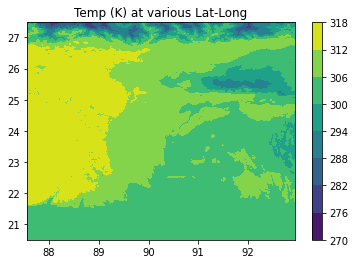

In [22]:
fig, ax = plt.subplots()
colour = Z[8]

cntr = ax.contourf(long, lat, colour)

fig.colorbar(cntr, ax=ax)
ax.set_title("Temp (K) at various Lat-Long")
plt.show()

## Animation
https://towardsdatascience.com/basics-of-gifs-with-pythons-matplotlib-54dd544b6f30

File: **fg.T1Hmax.UMRA2T.19910428_19910501.BOB01.4p4km.nc** \
Modeling: max wind-speed per hour; Storm BOB01 @ 4.4 km resolution; from 28-04-1991 -> 01-05-1991 (over 3 days) 

In [37]:
import imageio
import os

PATH = "../data/1991TS"
FILENAME = "fg.T1Hmax.UMRA2T.19910428_19910501.BOB01.4p4km.nc"

fn = f"{PATH}/{FILENAME}"
ds2 = nc.Dataset(fn)


lat2 = ds2.variables["latitude"][:]
long2 = ds2.variables["longitude"][:]
wind_speed = ds2.variables["wind_speed_of_gust"][:]

In [39]:
filenames = []
for idx, frame in enumerate(wind_speed):
    plt.contourf(long2, lat2, frame[0])
    filename = f"sc{idx}.png"
    filenames.append(filename)
    plt.savefig(filename)
    plt.close()
    
# build gif
with imageio.get_writer('vis.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

### Voila

![Animation](./vis.gif)

## Variable Exploration
Here I seek to plot and explain every variable in our dataset

In [13]:
PATH = "../data/1991TS"
FILENAME = "rsnds.T1Hpoint.UMRA2T.19910428_19910501.BOB01.1p5km.nc"

fn = f"{PATH}/{FILENAME}"
rsnds = nc.Dataset(fn)

from library import visualise

lat = rsnds.variables["latitude"][:]
long = rsnds.variables["longitude"][:]
surface_flux = rsnds.variables["net_down_surface_sw_flux_corrected"][:][0]
rsnds.variables

{'net_down_surface_sw_flux_corrected': <class 'netCDF4._netCDF4.Variable'>
 float32 net_down_surface_sw_flux_corrected(forecast_period, forecast_reference_time, latitude, longitude)
     long_name: net_down_surface_sw_flux_corrected
     units: W m-2
     um_stash_source: m01s01i202
     cell_methods: time: point
     grid_mapping: latitude_longitude
     coordinates: time
 unlimited dimensions: 
 current shape = (48, 9, 518, 400)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude_longitude': <class 'netCDF4._netCDF4.Variable'>
 int32 latitude_longitude()
     grid_mapping_name: latitude_longitude
     longitude_of_prime_meridian: 0.0
     earth_radius: 6371229.0
     proj4: +proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs
 unlimited dimensions: 
 current shape = ()
 filling on, default _FillValue of -2147483647 used,
 'forecast_period': <class 'netCDF4._netCDF4.Variable'>
 float64 forecast_period(forecast_period)
     bounds: forecast_period_bnds
     units: hou

In [12]:
visualise("flux.gif", long, lat, surface_flux)

In [40]:
zg = nc.Dataset(f"../data/1991TS/zg.T3Hpoint.UMRA2T.19910428_19910501.BOB01.4p4km.nc")

lat = zg.variables["latitude"][:]
long = zg.variables["longitude"][:]
geo_height = zg.variables["geopotential_height"][:][0][0]

In [42]:
OUTPUT_FILENAME = "./vis"
filenames = []
for idx, frame in enumerate(geo_height):
    plt.contourf(long2, lat2, frame)
    filename = f"sc{idx}.png"
    filenames.append(f"{OUTPUT_FILENAME}/{filename}")
    plt.savefig(f"{OUTPUT_FILENAME}/{filename}")
    plt.close()
    
# build gif
with imageio.get_writer('vis.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

In [45]:
print(zg.variables["pressure"][:])

[200. 300. 500. 700. 850.]

In [43]:
print(zg.variables.values())

dict_values([<class 'netCDF4._netCDF4.Variable'>
float32 geopotential_height(forecast_period, forecast_reference_time, pressure, latitude, 
longitude)
    standard_name: geopotential_height
    units: m
    um_stash_source: m01s16i202
    cell_methods: time: point
    grid_mapping: latitude_longitude
    coordinates: time
unlimited dimensions: 
current shape = (16, 9, 5, 790, 810)
filling on, default _FillValue of 9.969209968386869e+36 used, <class 
'netCDF4._netCDF4.Variable'>
int32 latitude_longitude()
    grid_mapping_name: latitude_longitude
    longitude_of_prime_meridian: 0.0
    earth_radius: 6371229.0
    proj4: +proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used, <class 'netCDF4._netCDF4.Variable'>
float64 forecast_period(forecast_period)
    bounds: forecast_period_bnds
    units: hours
    standard_name: forecast_period
unlimited dimensions: 
current shape = (16,)
filling on, default _FillValue of 9.969209968386869e+36 used, <class 
'netCDF4._netCDF4.Variable'>
float64 forecast_period_bnds(forecast_period, bnds)
unlimited dimensions: 
current shape = (16, 2)
filling on, default _FillValue of 9.969209968386869e+36 used, <class 
'netCDF4._netCDF4.Variable'>
float64 forecast_reference_time(forecast_reference_time)
    axis: T
    units: hours since 1970-01-01 00:00:00
    standard_name: forecast_reference_time
    calendar: gregorian
unlimited dimensions: 
current shape = (9,)
filling on, default _FillValue of 9.969209968386869e+36 used, <class 
'netCDF4._netCDF4.Variable'>
float32 pressure(pressure)
    axis: Z
    units: hPa
    long_name: pressure
unlimited dimensions: 
current shape = (5,)
filling on, default _FillValue of 9.969209968386869e+36 used, <class 
'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    axis: Y
    units: degrees_north
    standard_name: latitude
unlimited dimensions: 
current shape = (790,)
filling on, default _FillValue of 9.969209968386869e+36 used, <class 
'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    axis: X
    units: degrees_east
    standard_name: longitude
unlimited dimensions: 
current shape = (810,)
filling on, default _FillValue of 9.969209968386869e+36 used, <class 
'netCDF4._netCDF4.Variable'>
float64 time(forecast_reference_time, forecast_period)
    units: hours since 1970-01-01 00:00:00
    standard_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (9, 16)
filling on, default _FillValue of 9.969209968386869e+36 used])